die ersten 2 blocks kannst du weglassen

In [24]:
import numpy as np
import os
from skimage.io import imread
from glob import glob
import sys


# Current folder as project_root
# Going three layers of folders upwards to src
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_dir      = os.path.join(project_root)

# Add the src directory to the Python module search path
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

# Import functions for loading images
from src.imread_all import load_nih3t3_images, load_n2dl_hela_images, load_n2dh_gowt1_images


# Load images and ground-truth masks from the datasets
imgs_N2DH_GOWT1, gts_N2DH_GOWT1, img_paths_N2DH_GOWT1, gt_paths_N2DH_GOWT1 = load_n2dh_gowt1_images(base_path=os.path.join(project_root, "data-git", "N2DH-GOWT1"))
imgs_N2DL_HeLa, gts_N2DL_HeLa, img_paths_N2DL_HeLa, gt_paths_N2DL_HeLa = load_n2dl_hela_images(base_path=os.path.join(project_root, "data-git", "N2DL-HeLa"))
imgs_NIH3T3, gts_NIH3T3, img_paths_NIH3T3, gt_paths_NIH3T3 = load_nih3t3_images(base_path=os.path.join(project_root, "data-git", "NIH3T3"))



In [25]:
from src.Dice_Score_comparison import calculate_dice_scores_global
from src.show_imgs import plot_images_side_by_side
from src.find_image import find_and_load_image
from src.pre_processing import gammacorrection

img_gowt1 = imread((os.path.join(project_root,"data-git","N2DH-GOWT1", "img", "t01.tif")), as_gray=True)

# Compute Dice scores for each dataset
dice_all_gowt1_global = calculate_dice_scores_global(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)
dice_all_hela_global = calculate_dice_scores_global(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_all_nih_global = calculate_dice_scores_global(imgs_NIH3T3, gts_NIH3T3)

# Convert numpy floats to plain Python floats for clearer output
dice_all_gowt1_global = [float(score) for score in dice_all_gowt1_global]
dice_all_hela_global = [float(score) for score in dice_all_hela_global]
dice_all_nih_global = [float(score) for score in dice_all_nih_global]

# vector with all Dice scores with our Otsu Global
dice_all_global = dice_all_gowt1_global + dice_all_hela_global + dice_all_nih_global

GAMMA

one of our methods etc. 
equation: 
gamma value 0.6 was used because it shows best mean performance. See data-preprocessing/Optimization/gamma.
here an example of what it does:

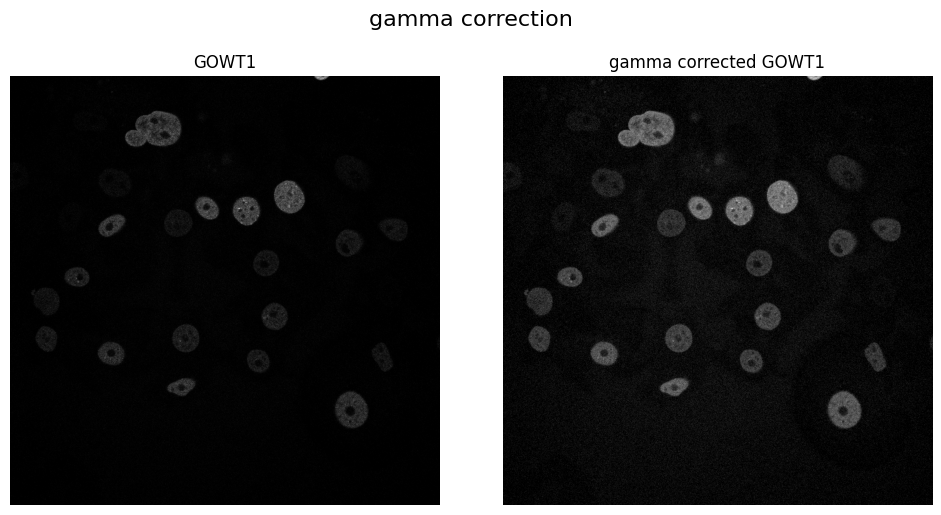

In [26]:
#-----------------
# GAMMA CORRECTION
#-----------------

img_gowt1_gamma = gammacorrection(img_gowt1, gamma=0.6)

images_gamma = [img_gowt1, img_gowt1_gamma]
titles_img_gamma = ["GOWT1", "gamma corrected GOWT1"]

plot_images_side_by_side(images_gamma, titles=titles_img_gamma, main_title="gamma correction")

When applied before segmentation can strongly enhance performance. To find out the best gamma value, following code is used.

=== Processing N2DH-GOWT1 ===
Gamma 0.10 → Mean Dice: 0.2934
Gamma 0.20 → Mean Dice: 0.2934
Gamma 0.30 → Mean Dice: 0.2934
Gamma 0.40 → Mean Dice: 0.2934
Gamma 0.50 → Mean Dice: 0.4482
Gamma 0.60 → Mean Dice: 0.6783
Gamma 0.70 → Mean Dice: 0.6879
Gamma 0.80 → Mean Dice: 0.6401
Gamma 0.90 → Mean Dice: 0.5958
Gamma 1.00 → Mean Dice: 0.5471
Gamma 1.10 → Mean Dice: 0.4716
Gamma 1.20 → Mean Dice: 0.4440
Gamma 1.30 → Mean Dice: 0.3843
Gamma 1.40 → Mean Dice: 0.3571
Gamma 1.50 → Mean Dice: 0.3164
Gamma 1.60 → Mean Dice: 0.3009
Gamma 1.70 → Mean Dice: 0.2712
Gamma 1.80 → Mean Dice: 0.2441
Gamma 1.90 → Mean Dice: 0.2359
Gamma 2.00 → Mean Dice: 0.2152
=== Processing N2DL-HeLa ===
Gamma 0.10 → Mean Dice: 0.8865
Gamma 0.20 → Mean Dice: 0.8828
Gamma 0.30 → Mean Dice: 0.8753
Gamma 0.40 → Mean Dice: 0.8623
Gamma 0.50 → Mean Dice: 0.8453
Gamma 0.60 → Mean Dice: 0.8238
Gamma 0.70 → Mean Dice: 0.7966
Gamma 0.80 → Mean Dice: 0.7738
Gamma 0.90 → Mean Dice: 0.7441
Gamma 1.00 → Mean Dice: 0.7164
Gamma 1.10 

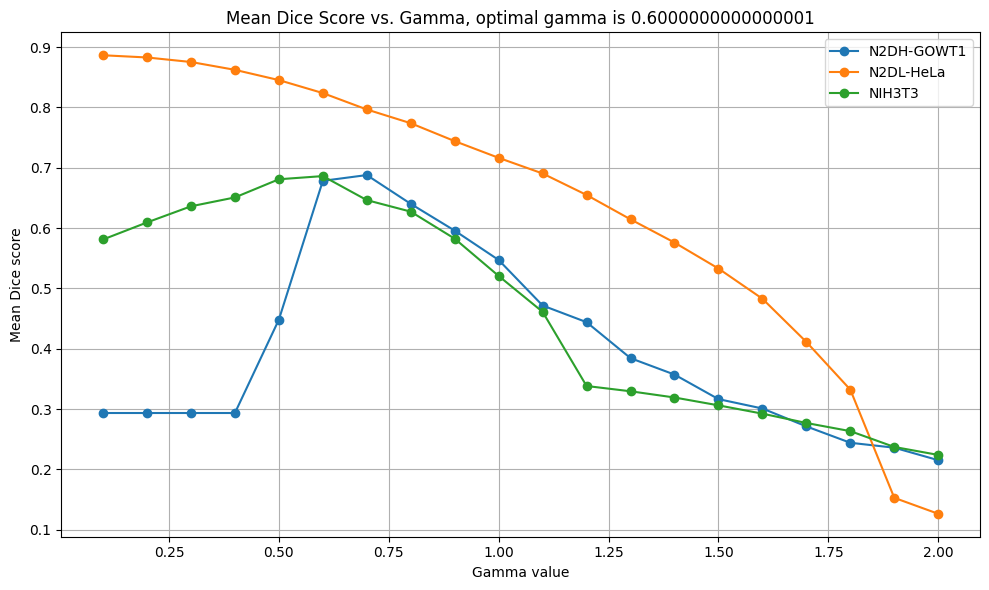

In [27]:
from src.optimization_gamma import evaluate_datasets, find_best_gamma, plot_mean_dice_vs_gamma

if __name__ == '__main__':
    gamma_values = np.arange(0.1, 2.1, 0.1)
    datasets = [
        ('N2DH-GOWT1', load_n2dh_gowt1_images),
        ('N2DL-HeLa', load_n2dl_hela_images),
        ('NIH3T3',  load_nih3t3_images),
    ]

    all_means_gamma = evaluate_datasets(datasets, gamma_values, path= project_root)

    best_gamma, best_dice = find_best_gamma(all_means_gamma, gamma_values)
    print(f"Optimal gamma value: {best_gamma:.2f}  Mean Dice = {best_dice:.4f}")

    dataset_names = [name for name, _ in datasets]
    plot_mean_dice_vs_gamma(gamma_values, all_means_gamma, dataset_names, y=best_gamma)

In [28]:


# import function for gamma correction + global otsu thresholding + dice score calculation
from src.Dice_Score_comparison import calculate_dice_scores_gamma_global

# apply gamma correction and global otsu thresholding on all images and calculate dice scores of each dataset 
dice_scores_NIH3T3_gamma_global = calculate_dice_scores_gamma_global(imgs_NIH3T3, gts_NIH3T3)
dice_scores_N2DL_HeLa_gamma_global = calculate_dice_scores_gamma_global(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_scores_N2DH_GOWT1_gamma_global = calculate_dice_scores_gamma_global(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)

# vector with all dice score of gamma correction + global otsu thresholding
all_dice_scores_gamma_global =  dice_scores_N2DH_GOWT1_gamma_global + dice_scores_N2DL_HeLa_gamma_global + dice_scores_NIH3T3_gamma_global 



here you see how much better with gamma....

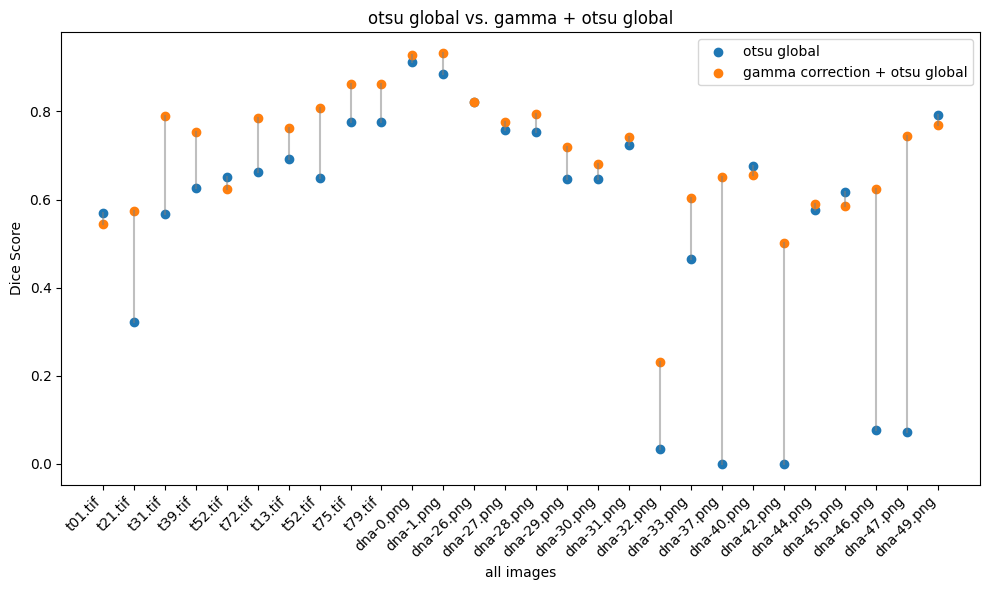

In [29]:
from src.Plots import plot_pairwise_scores

# Spaghetti plot gamma correction + otsu global
# Datasets
labels = [
    't01.tif', 't21.tif', 't31.tif', 't39.tif', 't52.tif', 't72.tif',  # N2DH-GOWT1
    't13.tif', 't52.tif', 't75.tif', 't79.tif',                        # N2DL-HeLa
    'dna-0.png', 'dna-1.png', 'dna-26.png', 'dna-27.png',
    'dna-28.png', 'dna-29.png', 'dna-30.png', 'dna-31.png',
    'dna-32.png', 'dna-33.png', 'dna-37.png', 'dna-40.png',
    'dna-42.png', 'dna-44.png', 'dna-45.png', 'dna-46.png',
    'dna-47.png', 'dna-49.png'                                        # NIH3T3
]

# Define indices for the labels of the later x-axis 
file_names = np.arange(len(labels))

plot_pairwise_scores(file_names, dice_all_global, all_dice_scores_gamma_global, 
                     labels=labels, 
                     title= "otsu global vs. gamma + otsu global", 
                     xlabel="all images", 
                     legend_labels=("otsu global", "gamma correction + otsu global")  )

Histogram equalization


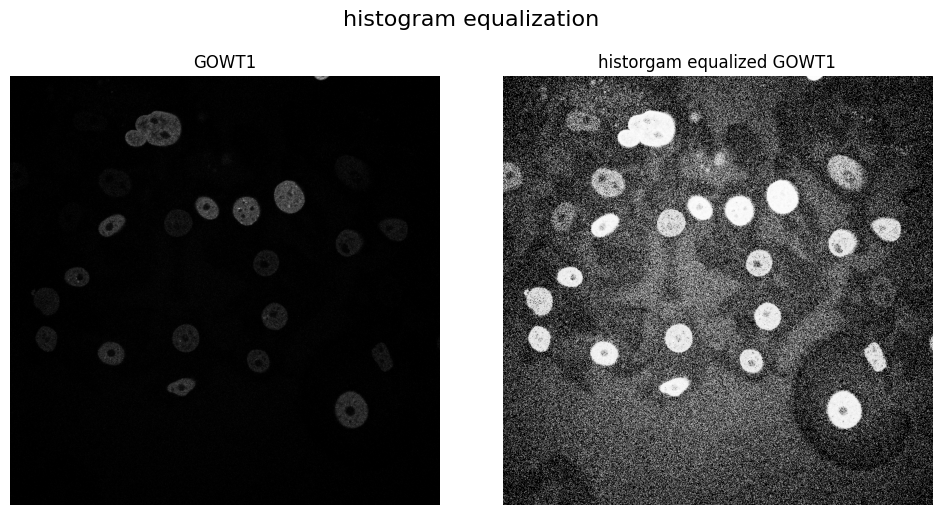

In [30]:
from src.pre_processing import histogramequalization

img_gowt1_histeq = histogramequalization(img_gowt1)

images_histeq = [img_gowt1, img_gowt1_histeq]
titles_img_histeq = ["GOWT1", "historgam equalized GOWT1"]

plot_images_side_by_side(images_histeq, titles=titles_img_histeq, main_title="histogram equalization")



In [31]:
from src.Dice_Score_comparison import calculate_dice_scores_histeq_global

# apply histogram equalization and global otsu thresholding on all images and calculate dice scores of each dataset 
dice_scores_NIH3T3_histeq_global = calculate_dice_scores_histeq_global(imgs_NIH3T3, gts_NIH3T3)
dice_scores_N2DL_HeLa_histeq_global = calculate_dice_scores_histeq_global(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_scores_N2DH_GOWT1_histeq_global = calculate_dice_scores_histeq_global(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)

# vector with all dice score of histogram equalization + global otsu thresholding
all_dice_scores_histeq_global =  dice_scores_N2DH_GOWT1_histeq_global + dice_scores_N2DL_HeLa_histeq_global + dice_scores_NIH3T3_histeq_global

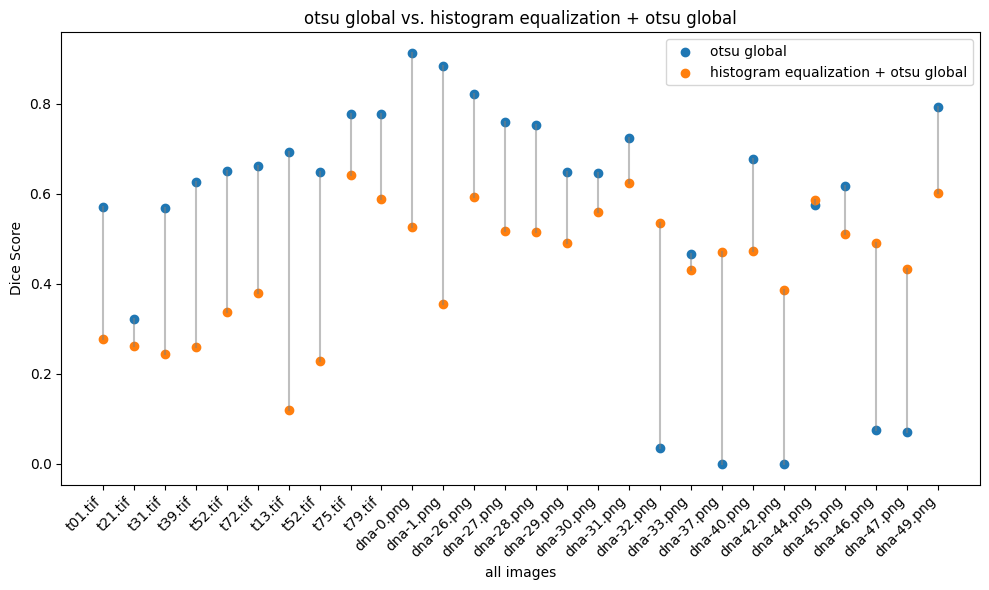

In [32]:
# Define indices for the labels of the later x-axis 
plot_pairwise_scores(file_names, dice_all_global, all_dice_scores_histeq_global, 
                     labels=labels, 
                     title= "otsu global vs. histogram equalization + otsu global", 
                     xlabel="all images", 
                     legend_labels=("otsu global", "histogram equalization + otsu global")  )

often worse because of enhanced uneven illumination and noise

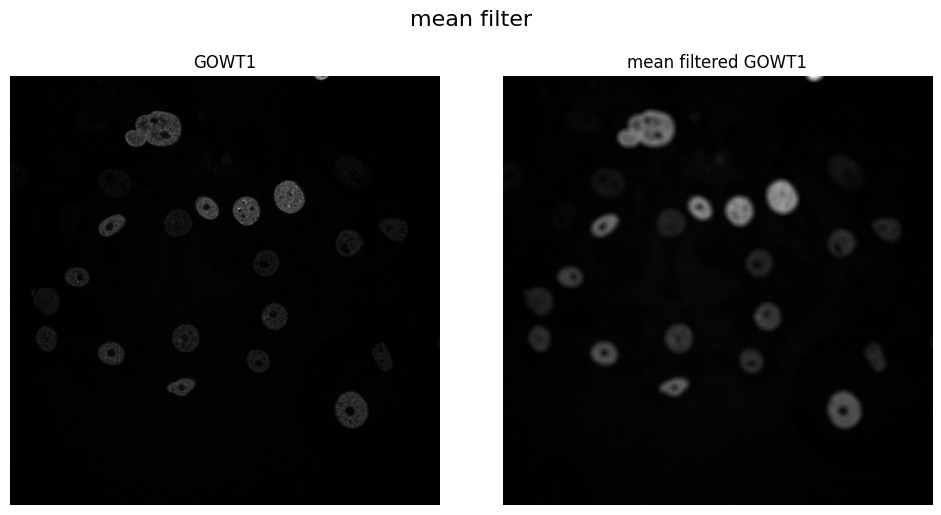

In [33]:
from src.pre_processing import mean_filter

img_gowt1_filtered = mean_filter(img_gowt1)

images_filtered = [img_gowt1, img_gowt1_filtered]
titles_img_filtered = ["GOWT1", "mean filtered GOWT1"]

plot_images_side_by_side(images_filtered, titles=titles_img_filtered, main_title="mean filter")


In [34]:
from src.Dice_Score_comparison import calculate_dice_scores_meanfilter_global

# apply mean filter and global otsu thresholding on all images and calculate dice scores of each dataset 
dice_scores_NIH3T3_meanfilter_global = calculate_dice_scores_meanfilter_global(imgs_NIH3T3, gts_NIH3T3)
dice_scores_N2DL_HeLa_meanfilter_global = calculate_dice_scores_meanfilter_global(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_scores_N2DH_GOWT1_meanfilter_global = calculate_dice_scores_meanfilter_global(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)

# vector with all dice score of mean filter + global otsu thresholding
all_dice_scores_meanfilter_global =  dice_scores_N2DH_GOWT1_meanfilter_global + dice_scores_N2DL_HeLa_meanfilter_global + dice_scores_NIH3T3_meanfilter_global

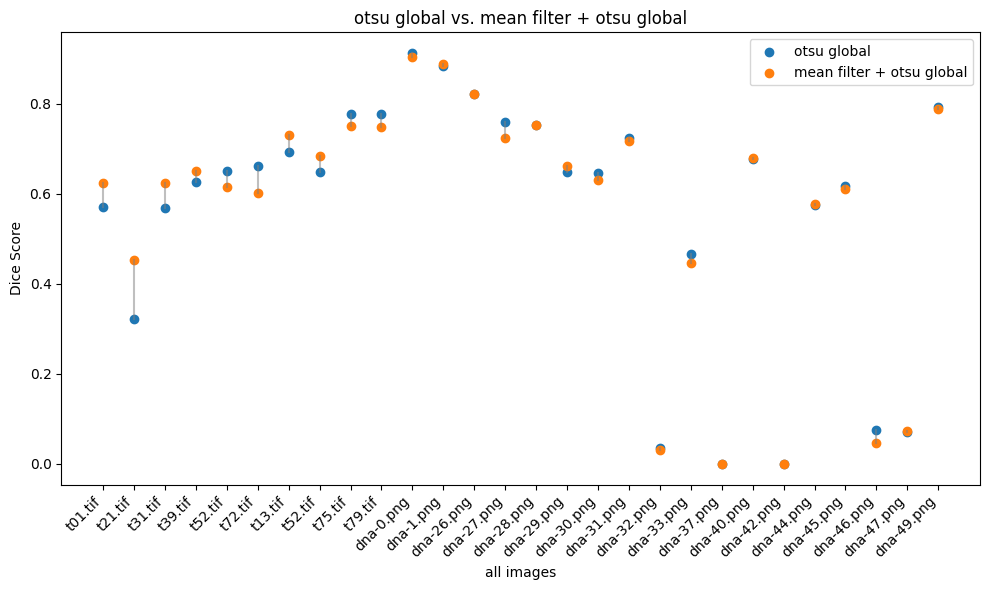

In [35]:
plot_pairwise_scores(file_names, dice_all_global, all_dice_scores_meanfilter_global, 
                     labels=labels, 
                     title= "otsu global vs. mean filter + otsu global", 
                     xlabel="all images", 
                     legend_labels=("otsu global", "mean filter + otsu global")  )

wienerfilter

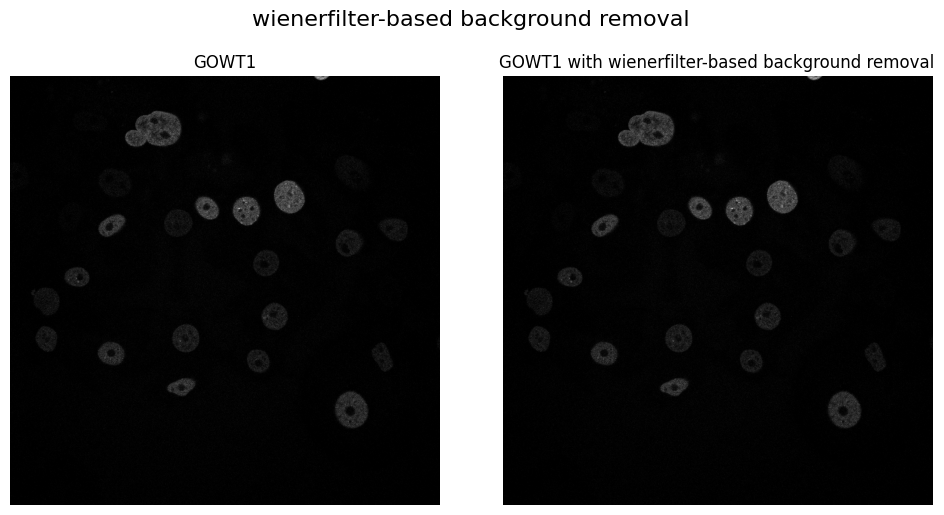

In [36]:
from src.pre_processing import local_wiener_filter

background = local_wiener_filter(img_gowt1)
img_gowt1_wiener = img_gowt1 - background

images_wiener = [img_gowt1, img_gowt1_wiener]
titles_img_wiener = ["GOWT1", "GOWT1 with wienerfilter-based background removal"]

plot_images_side_by_side(images_wiener, titles=titles_img_wiener, main_title="wienerfilter-based background removal")


from src.Dice_Score_comparison import calculate_dice_scores_wienerfilter_global

# apply wiener filter and global otsu thresholding on all images and calculate dice scores of each dataset 
dice_scores_NIH3T3_wienerfilter_global = calculate_dice_scores_wienerfilter_global(imgs_NIH3T3, gts_NIH3T3)
dice_scores_N2DL_HeLa_wienerfilter_global = calculate_dice_scores_wienerfilter_global(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_scores_N2DH_GOWT1_wienerfilter_global = calculate_dice_scores_wienerfilter_global(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)

# vector with all dice score of wiener filter + global otsu thresholding
all_dice_scores_wienerfilter_global =  dice_scores_N2DH_GOWT1_wienerfilter_global + dice_scores_N2DL_HeLa_wienerfilter_global + dice_scores_NIH3T3_wienerfilter_global

# save the output
np.save(os.path.join(project_root, "output", "all_dice_scores_wienerfilter"))

In [37]:
# the dice scores were be calculated with code above (takes around 40 min)

# load the saved dice scores from above
all_dice_scores_wienerfilter_global = np.load(os.path.join(project_root, "output", "all_dice_scores_wienerfilter_global.npy"))

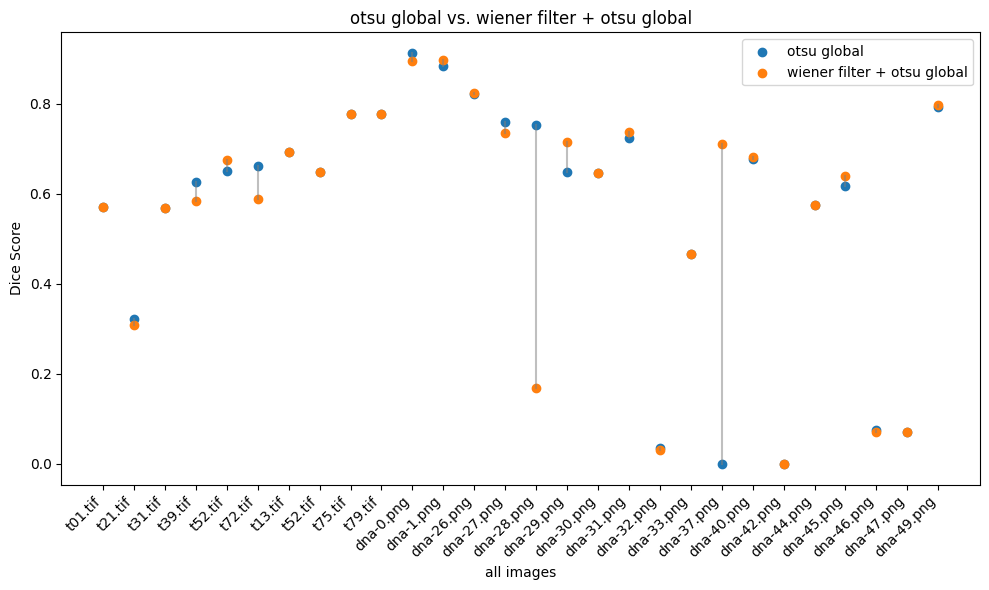

In [38]:
plot_pairwise_scores(file_names, dice_all_global, all_dice_scores_wienerfilter_global, 
                     labels=labels, 
                     title= "otsu global vs. wiener filter + otsu global", 
                     xlabel="all images", 
                     legend_labels=("otsu global", "wiener filter + otsu global")  )

# NOW MEANFILTER WITH GAMMA CORRECTION

In [39]:
from src.Dice_Score_comparison import calculate_dice_scores_gamma_meanfilter_global

# apply gamma_meanfilter and global otsu thresholding on all images and calculate dice scores of each dataset 
dice_scores_NIH3T3_gamma_meanfilter_global = calculate_dice_scores_gamma_meanfilter_global(imgs_NIH3T3, gts_NIH3T3)
dice_scores_N2DL_HeLa_gamma_meanfilter_global = calculate_dice_scores_gamma_meanfilter_global(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_scores_N2DH_GOWT1_gamma_meanfilter_global = calculate_dice_scores_gamma_meanfilter_global(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)

# vector with all dice score of gamma_meanfilter + global otsu thresholding
all_dice_scores_gamma_meanfilter_global =  dice_scores_N2DH_GOWT1_gamma_meanfilter_global + dice_scores_N2DL_HeLa_gamma_meanfilter_global + dice_scores_NIH3T3_gamma_meanfilter_global

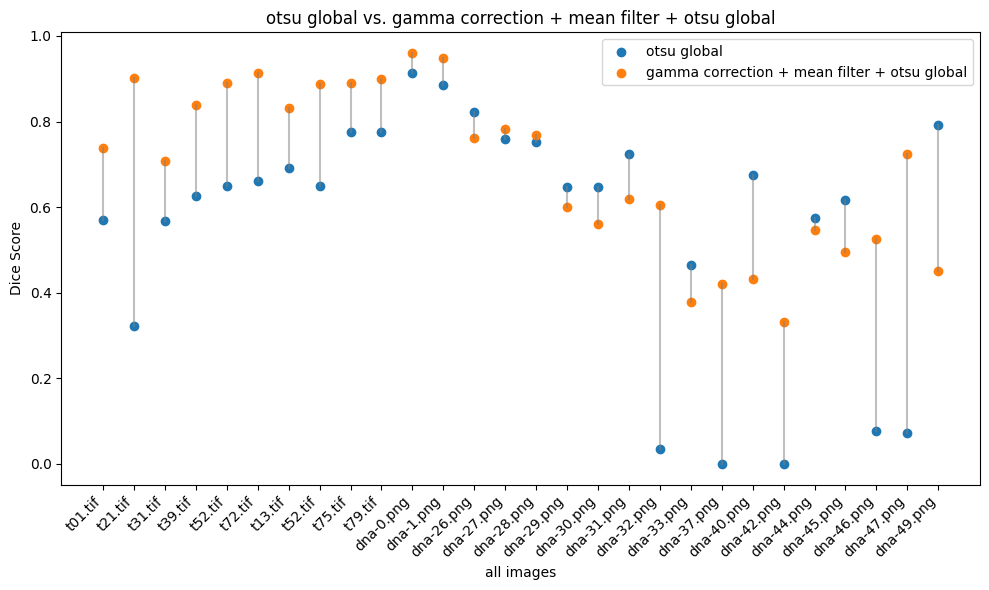

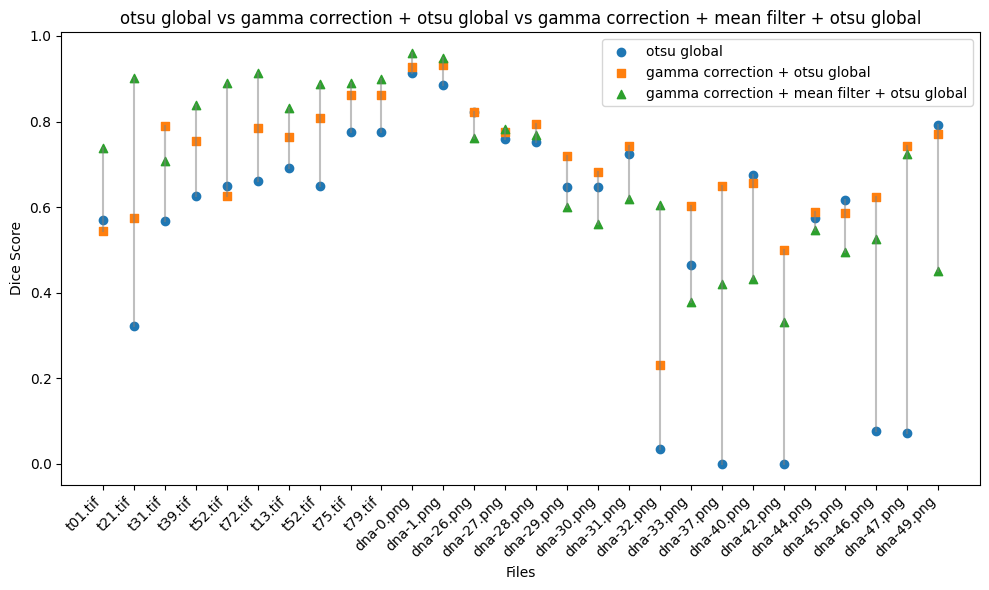

In [40]:
from src.Plots import plot_pairwise_scores, plot_triplet_scores

# Spaghetti plot gamma correction + otsu global
# Datasets
labels = [
    't01.tif', 't21.tif', 't31.tif', 't39.tif', 't52.tif', 't72.tif',  # N2DH-GOWT1
    't13.tif', 't52.tif', 't75.tif', 't79.tif',                        # N2DL-HeLa
    'dna-0.png', 'dna-1.png', 'dna-26.png', 'dna-27.png',
    'dna-28.png', 'dna-29.png', 'dna-30.png', 'dna-31.png',
    'dna-32.png', 'dna-33.png', 'dna-37.png', 'dna-40.png',
    'dna-42.png', 'dna-44.png', 'dna-45.png', 'dna-46.png',
    'dna-47.png', 'dna-49.png'                                        # NIH3T3
]

# Define indices for the labels of the later x-axis 
file_names = np.arange(len(labels))

plot_pairwise_scores(file_names, dice_all_global, all_dice_scores_gamma_meanfilter_global, 
                     labels=labels, 
                     title= "otsu global vs. gamma correction + mean filter + otsu global", 
                     xlabel="all images", 
                     legend_labels=("otsu global", "gamma correction + mean filter + otsu global")  )

plot_triplet_scores(file_names, dice_all_global, all_dice_scores_gamma_global, all_dice_scores_gamma_meanfilter_global,
                    labels=labels,
                    legend_labels=("otsu global", "gamma correction + otsu global", "gamma correction + mean filter + otsu global"),
                    title="otsu global vs gamma correction + otsu global vs gamma correction + mean filter + otsu global" )

# NOW GLOBAL vs LOCAL PLOT

In [41]:
import pandas as pd

# load otsu local dice scores
df = pd.read_csv(os.path.join(project_root, "best_radius_our_package.csv"))
dice_scores_local_otsu = df["DiceScore"].values

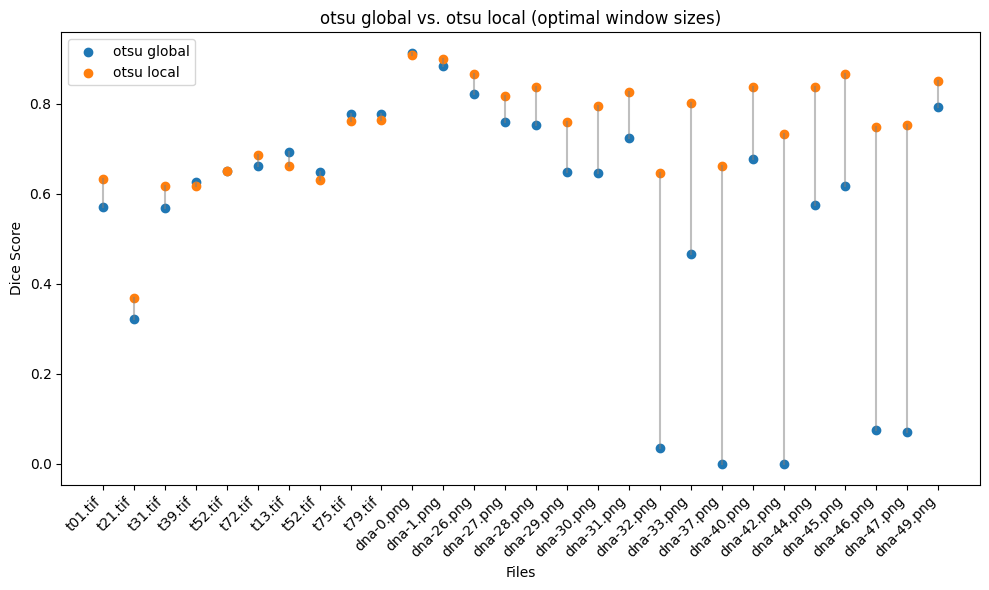

In [42]:
plot_pairwise_scores(file_names, dice_all_global, dice_scores_local_otsu, labels=labels, title="otsu global vs. otsu local (optimal window sizes)", legend_labels=("otsu global", "otsu local"))

# spaghetti plot mit global, global + gamma, local, local + gamma

In [43]:
from typing import Callable, Dict, List, Tuple

# calculate all gamma correction + otsu local (optimal window sizes) dice scores

# Dataset configuration, containing 
DatasetConfig = Tuple[
    str,
    Callable[..., Tuple[List[np.ndarray], List[np.ndarray], List[str], List[str]]],
    Dict[int, int],
    Callable[[str], int]
]

datasets: List[DatasetConfig] = [
    (
        'NIH3T3',
        load_nih3t3_images,
        { 0:550,1:500,26:150,27:100,28:250,29:150,30:100,31:100,32:100,33:150,37:100,40:200,42:150,44:150,45:150,46:150,47:150,49:150 },
        lambda p: int(Path(p).stem.split('-')[-1])
    ),
    (
        'N2DL-HeLa',
        load_n2dl_hela_images,
        {13:700,52:200,75:50,79:50},
        lambda p: int(Path(p).stem.split('t')[-1])
    ),
    (
        'N2DH-GOWT1',
        load_n2dh_gowt1_images,
        {1:350,21:550,31:450,39:450,52:900,72:100},
        lambda p: int(Path(p).stem.split('t')[-1])
    ),
]




In [44]:
# import function for gamma correction + local otsu thresholding + dice score calculation
from src.Dice_Score_comparison import calculate_dice_scores_gamma_local

# apply gamma correction and local otsu thresholding on all images and calculate dice scores of each dataset 
dice_scores_NIH3T3_gamma_local = calculate_dice_scores_gamma_local(imgs_NIH3T3, gts_NIH3T3)
dice_scores_N2DL_HeLa_gamma_local = calculate_dice_scores_gamma_local(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_scores_N2DH_GOWT1_gamma_local = calculate_dice_scores_gamma_local(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)

# vector with all dice score of gamma correction + local otsu thresholding
all_dice_scores_gamma_local =  dice_scores_N2DH_GOWT1_gamma_local + dice_scores_N2DL_HeLa_gamma_local + dice_scores_NIH3T3_gamma_local

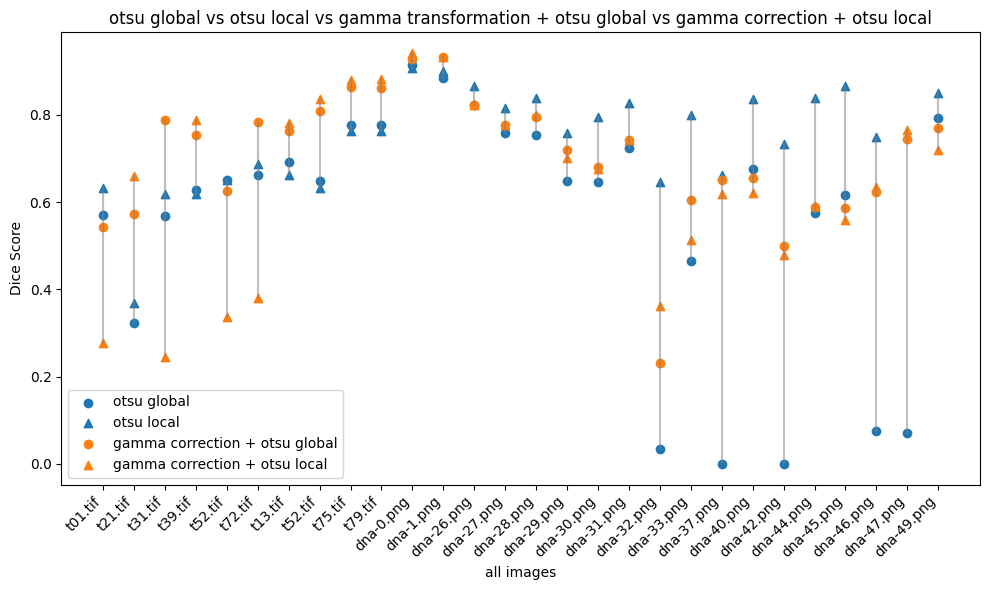

In [45]:
from src.Plots import plot_quadruplet_scores

plot_quadruplet_scores(file_names, dice_all_global, dice_scores_local_otsu, all_dice_scores_gamma_global, all_dice_scores_gamma_local, 
                     labels=labels, 
                     title= "otsu global vs otsu local vs gamma transformation + otsu global vs gamma correction + otsu local", 
                     xlabel="all images", 
                     legend_labels=("otsu global","otsu local","gamma correction + otsu global",  "gamma correction + otsu local")  )

# SPAGHETTI PLOT LOCAL VS LOCAL GAMMA

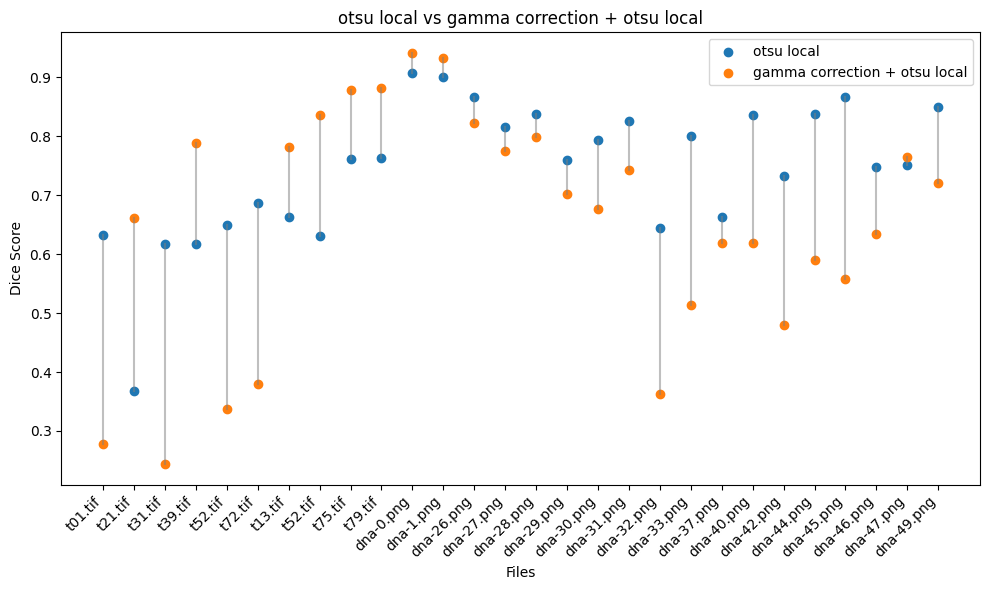

In [46]:
plot_pairwise_scores(file_names, dice_scores_local_otsu, all_dice_scores_gamma_local, 
                     labels=labels, 
                     title="otsu local vs gamma correction + otsu local", 
                     legend_labels=("otsu local", "gamma correction + otsu local"))

# SPAGHETTI PLOT LOCAL OTSU vs GAMMA + LOCAL vs GAMMA + MEANFILTER + LOCAL

In [47]:


evaluate_all_local()

NameError: name 'evaluate_all_local' is not defined

In [ ]:
from src.Plots import plot_triplet_scores

plot_triplet_scores(file_names, dice_scores_local_otsu, all_dice_scores_gamma_local, all_dice_scores_gamma_meanfilter_local,
                    labels=labels,
                    legend_labels=("otsu global", "gamma correction + otsu global", "gamma correction + mean filter + otsu global"),
                    title="otsu global vs gamma correction + otsu global vs gamma correction + mean filter + otsu global" )